In [67]:
# Importación de librerías:

# Tratamiento de datos:
import pandas as pd
import numpy as np

import re

# -----------------------------------------------------------------------
# Imputación de nulos usando métodos avanzados estadísticos:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# -----------------------------------------------------------------------
# Visualización:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
print(plt.rcParams['font.family'])

# -----------------------------------------------------------------------
# Evaluación de la linealidad de las relaciones entre variables y su distribución:
import scipy.stats as stats
from scipy.stats import shapiro, kstest, skew
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# -----------------------------------------------------------------------
# Configuración para poder visualizar todas las columnas de los DataFrames:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# -----------------------------------------------------------------------
# Gestión de los warnings:
import warnings
warnings.filterwarnings("ignore")

['sans-serif']


In [68]:
# Cargamos el primer DataFrame con la información sobre la actividad de vuelo de los clientes.
df_flight_actv = pd.read_csv("Customer Flight Activity.csv")

In [69]:
# Cargamos el segundo DataFrame con la información sobre el perfil detallado de los clientes.
df_loyalty_hist = pd.read_csv("Customer Loyalty History.csv")

### **Fase 1\. <span style="color:#00bf63">Exploración y Limpieza:</span>**
#### **1.1 <span>Exploración Inicial:</span>**

##### **<span style="color:#FFA500">EDA "Customer Flight Activity.csv"</span>**

In [70]:
df_flight_actv.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [71]:
df_flight_actv.tail()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


In [72]:
df_flight_actv.sample(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
332404,700566,2018,8,13,0,13,1053,105.00,0,0
170338,171137,2017,11,0,0,0,0,0.00,0,0
309737,396446,2018,7,11,5,16,3664,366.00,0,0
266574,530666,2018,3,6,6,12,2448,305.00,644,52
12596,767678,2017,1,0,0,0,0,0.00,0,0
317849,825165,2018,7,0,0,0,0,0.00,0,0
84560,102740,2017,6,0,0,0,0,0.00,0,0
78440,677068,2017,5,12,2,14,2114,211.00,0,0
227302,518064,2018,4,3,1,4,860,92.88,0,0
347932,626664,2018,9,4,0,4,2564,256.00,0,0


In [73]:
print(f"Número de filas: {df_flight_actv.shape[0]}\nNúmero de columnas: {df_flight_actv.shape[1]}")

Número de filas: 405624
Número de columnas: 10


In [74]:
df_flight_actv.info()
# Encontramos que las columnas "Points Redeemed" y "Dollar Cost Points Redeemed" son de tipo int, y deberían ser float.
# "Dollar Cost Points Redeemed" concierne cifras monetarias y no deberíamos excluir los decimales.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [75]:
# Imprimimos el nombre de todas las columnas.
df_flight_actv.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [76]:
# Realizamos una exploración de los valores únicos por columna para detectar valores atípicos:

print(f"Valores únicos en Loyalty Number: {df_flight_actv["Loyalty Number"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Year: {df_flight_actv["Year"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Month: {df_flight_actv["Month"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Flights Booked: {df_flight_actv["Flights Booked"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Flights with Companions: {df_flight_actv["Flights with Companions"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Total Flights: {df_flight_actv["Total Flights"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Distance: {df_flight_actv["Distance"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Points Accumulated: {df_flight_actv["Points Accumulated"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Points Redeemed: {df_flight_actv["Points Redeemed"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Dollar Cost Points Redeemed: {df_flight_actv["Dollar Cost Points Redeemed"].unique()}")

Valores únicos en Loyalty Number: [100018 100102 100140 ... 999731 999788 999891]
--------------------------------------------------------------------------------------------
Valores únicos en Year: [2017 2018]
--------------------------------------------------------------------------------------------
Valores únicos en Month: [ 1  9  2  3 11  4  5  7  6  8 10 12]
--------------------------------------------------------------------------------------------
Valores únicos en Flights Booked: [ 3 10  6  0  8 11  9  4  7  5  2  1 12 13 14 16 15 17 18 19 20 21]
--------------------------------------------------------------------------------------------
Valores únicos en Flights with Companions: [ 0  4  7  1  6  3  5  2 10  8  9 11]
--------------------------------------------------------------------------------------------
Valores únicos en Total Flights: [ 3 14  6  0 15 11 12 10  8  9  7  5 16  2  1 17 13 22  4 19 18 21 26 20
 23 25 27 24 28 30 29 31 32]
------------------------------------

In [80]:
# Hacemos un chequeo de los valores de la columna "Points Accumulated", 
# decidimos mantener el tipo de dato en float para no perder los decimales.
df_flight_actv["Points Accumulated"].sample(10)

# Cambiaremos el tipo de dato de la columna "Points Redeemed" de int a float
# para que ambas columnas que contienen datos sobre los puntos sigan el mismo patrón.

61136       0.0
347937      0.0
83257       0.0
269992    642.0
326881    474.0
278247    163.0
161737    365.0
201053    162.0
195692      0.0
338409    124.2
Name: Points Accumulated, dtype: float64

In [81]:
# Comprobamos la cantidad de duplicados que contiene este Dataframe, pero realizaremos las funciones de limpieza más adelante, en el apartado de "Limpieza de Datos".
df_flight_actv.duplicated().sum()

1864

In [82]:
# DUPLICADOS:

# Calculamos el número total de filas en la columna Loyalty Number.
numero_filas = df_flight_actv.shape[0]
print(f"Número de filas en el DataFrame: {numero_filas }")

# Calculamos el número de valores duplicados en la columna Loyalty Number.
duplicados = df_flight_actv["Loyalty Number"].duplicated().sum()
print(f"Valores duplicados en la columna Loyalty Number: {duplicados}")

# Calculamos el porcentaje de duplicados.
porcentaje_duplicados = (duplicados / numero_filas) * 100
print(f"Porcentaje duplicado: {porcentaje_duplicados:.2f}%")

Número de filas en el DataFrame: 405624
Valores duplicados en la columna Loyalty Number: 388887
Porcentaje duplicado: 95.87%


In [83]:
# NULOS:
# Comprobamos la cantidad de nulos en el DataFrame.
df_flight_actv.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [84]:
# Exploramos los valores estadísticos de todas las columnas, ya que son todas numéricas, transponiendo los axis.
df_flight_actv.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


##### **<span style="color:#FFA500">EDA "Customer Loyalty History.csv"</span>**

In [85]:
df_loyalty_hist.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [86]:
df_loyalty_hist.tail()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


In [87]:
df_loyalty_hist.sample(10)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
7913,550896,Canada,Quebec,Montreal,H4G 3T4,Male,Bachelor,61644.0,Married,Nova,7981.44,Standard,2013,3,NaN,NaN
13705,173506,Canada,Quebec,Montreal,H2Y 2W2,Male,Bachelor,96307.0,Single,Nova,2798.68,2018 Promotion,2018,4,NaN,NaN
14420,382739,Canada,Quebec,Montreal,H2T 9K8,Male,College,NaN,Single,Nova,7286.16,2018 Promotion,2018,3,NaN,NaN
8522,413266,Canada,Ontario,Sudbury,M5V 1G5,Male,College,NaN,Single,Nova,9333.08,Standard,2016,9,NaN,NaN
5856,650657,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Single,Nova,4463.61,Standard,2015,6,NaN,NaN
9002,352702,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,52204.0,Married,Nova,12663.60,Standard,2014,8,NaN,NaN
13847,379572,Canada,Quebec,Montreal,H2Y 4R4,Female,Bachelor,69753.0,Married,Star,5632.61,Standard,2016,1,NaN,NaN
2145,951389,Canada,Ontario,Toronto,P5S 6R4,Male,Bachelor,55613.0,Married,Aurora,7519.03,Standard,2013,8,NaN,NaN
15086,416105,Canada,Quebec,Montreal,H2T 2J6,Female,Bachelor,74320.0,Divorced,Star,8433.23,Standard,2018,11,NaN,NaN
6552,533213,Canada,Ontario,Thunder Bay,K8T 5M5,Male,Bachelor,80544.0,Married,Nova,5314.96,Standard,2017,4,2017.0,12.0


In [88]:
print(f"Número de filas: {df_loyalty_hist.shape[0]}\nNúmero de columnas: {df_loyalty_hist.shape[1]}")

Número de filas: 16737
Número de columnas: 16


In [89]:
# Encontramos que las columnas "Cancellation Year" y "Cancellation Month",
# cuyos datos representan años y meses, son de tipo float, y deberían ser int.
df_loyalty_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [90]:
# Imprimimos el nombre de todas las columnas.
df_loyalty_hist.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [91]:
# Realizamos una exploración de los valores únicos por columna para detectar valores atípicos:

print(f"Valores únicos en Loyalty Number: {df_loyalty_hist["Loyalty Number"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Country: {df_loyalty_hist["Country"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Province: {df_loyalty_hist["Province"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en City: {df_loyalty_hist["City"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Postal Code: {df_loyalty_hist["Postal Code"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Gender: {df_loyalty_hist["Gender"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Education: {df_loyalty_hist["Education"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Salary: {df_loyalty_hist["Salary"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Marital Status: {df_loyalty_hist["Marital Status"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Loyalty Card: {df_loyalty_hist["Loyalty Card"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en CLV: {df_loyalty_hist["CLV"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Enrollment Type: {df_loyalty_hist["Enrollment Type"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Enrollment Year: {df_loyalty_hist["Enrollment Year"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Enrollment Month: {df_loyalty_hist["Enrollment Month"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Cancellation Year: {df_loyalty_hist["Cancellation Year"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Cancellation Month: {df_loyalty_hist["Cancellation Month"].unique()}")

Valores únicos en Loyalty Number: [480934 549612 429460 ... 776187 906428 652627]
--------------------------------------------------------------------------------------------
Valores únicos en Country: ['Canada']
--------------------------------------------------------------------------------------------
Valores únicos en Province: ['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
--------------------------------------------------------------------------------------------
Valores únicos en City: ['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']
---------------------------------------------------------

In [92]:
# Comprobamos la cantidad de duplicados en el DataFrame.
df_loyalty_hist.duplicated().sum()

0

In [93]:
# Encontramos que la columna "Loyalty Number", que contiene identificadores únicos y por la que haremos nuestra unión, no contiene duplicados.
df_loyalty_hist["Loyalty Number"].duplicated().sum()

0

In [94]:
# NULOS:
# Comprobamos la cantidad de nulos en el DataFrame.
df_loyalty_hist.isnull().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [95]:
# Imprimimos el número de datos faltantes por columna.
print(f"Nulos en Salary: {df_loyalty_hist["Salary"].isna().sum()}")
print("--------------------------------------------------------------------------------------------")
print(f"Nulos en Cancellation Year: {df_loyalty_hist["Cancellation Year"].isna().sum()}")
print("--------------------------------------------------------------------------------------------")
print(f"Nulos en Cancellation Month: {df_loyalty_hist["Cancellation Month"].isna().sum()}")

# Calculamos el porcentaje de nulos de las columnas donde sea mayor que 0.
porcentajes_nulos = df_loyalty_hist.isnull().mean() * 100
filtro = porcentajes_nulos[porcentajes_nulos > 0]
df_porcentajes = pd.DataFrame({'Porcentaje de nulos': filtro.apply(lambda x: f'{x:.2f}%')})

df_porcentajes

Nulos en Salary: 4238
--------------------------------------------------------------------------------------------
Nulos en Cancellation Year: 14670
--------------------------------------------------------------------------------------------
Nulos en Cancellation Month: 14670


,Porcentaje de nulos
Salary,25.32%
Cancellation Year,87.65%
Cancellation Month,87.65%


Observamos que las columnas "Cancellation Year" y "Cancellation Month" contienen un porcentaje muy elevado de nulos.

No imputaremos los valores faltantes ya que las columnas vecinas del DataFrame, y la cantidad de valores de la que disponemos no nos proporcionan información significativa suficiente para poder inferir con criterio. Además, al ser una gran cantidad de valores a rellenar, éstos tendrían un alto impacto en los análisis posteriores. Sin embargo, determinamos que no eliminaremos éstas columnas ya que también podrían ser significativas para la empresa en el futuro, tras una nueva recogida de datos.

Esto se debe a que "Cancellation Year" y "Cancellation Month", al tratarse del año y el mes en los que los clientes cancelaron su membresía, podrían influir en el estudio del comportamiento de los clientes dentro de un programa de lealtad de una aerolínea. ya que se trata del año y el mes en los que los clientes cancelaron su membresía.

In [96]:
# Exploramos los valores estadísticos de las columnas numéricas, transponiendo los axis.
df_loyalty_hist.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [97]:
# Exploramos los valores estadísticos de las columnas categóricas.
df_loyalty_hist.describe(include="O")

,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,Enrollment Type
count,16737,16737,16737,16737,16737,16737,16737,16737,16737
unique,1,11,29,55,2,5,3,3,2
top,Canada,Ontario,Toronto,V6E 3D9,Female,Bachelor,Married,Star,Standard
freq,16737,5404,3351,911,8410,10475,9735,7637,15766


#### **<span>Limpieza de Datos:</span>**

##### **<span style="color:#FFA500">Limpieza "Customer Flight Activity.csv"</span>**

In [98]:
# Función para cambiar datos de tipo INT ➡️ FLOAT.
# ----------------------------------------------------------------------

# Creamos la variable de las columnas a las que aplicaremos este cambio. 
int_a_float = ["Points Redeemed", "Dollar Cost Points Redeemed"]   
                                                                        
# ----------------------------------------------------------------------

def convertir_int_a_float(df, int_a_float):                                                                                                
    for columna in int_a_float:
        if columna in df.columns and pd.api.types.is_numeric_dtype(df[columna]):
            df[columna] = df[columna].astype(float)
            print(f"Columna {columna} convertida a float")

convertir_int_a_float(df_flight_actv, int_a_float)

Columna Points Redeemed convertida a float
Columna Dollar Cost Points Redeemed convertida a float


In [99]:
# Comprobamos los cambios tras aplicar la función de limpieza.
df_flight_actv[["Points Redeemed", "Dollar Cost Points Redeemed"]].dtypes

Points Redeemed                float64
Dollar Cost Points Redeemed    float64
dtype: object

In [100]:
# Realizamos una segunda comprobación.
print(f"Valores únicos en Points Redeemed corregidos: {df_flight_actv["Points Redeemed"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Dollar Cost Points Redeemed corregidos: {df_flight_actv["Dollar Cost Points Redeemed"].unique()}")

Valores únicos en Points Redeemed corregidos: [  0. 341. 364. 310. 445. 312. 343. 366. 389. 292. 447. 324. 456. 409.
 436. 327. 322. 291. 323. 300. 290. 309. 325. 386. 321. 363. 340. 670.
 443. 517. 444. 328. 344. 367. 313. 333. 293. 449. 297. 455. 372. 356.
 405. 381. 466. 419. 369. 352. 482. 335. 329. 305. 415. 396. 317. 348.
 314. 334. 350. 330. 318. 298. 420. 336. 471. 680. 441. 353. 484. 301.
 374. 417. 501. 299. 398. 307. 368. 306. 347. 439. 395. 481. 337. 382.
 426. 373. 399. 424. 326. 392. 438. 467. 480. 448. 308. 400. 376. 375.
 460. 339. 385. 611. 431. 320. 362. 404. 442. 410. 361. 319. 435. 414.
 464. 477. 315. 485. 370. 421. 349. 371. 416. 496. 510. 667. 465. 434.
 346. 487. 408. 500. 360. 378. 345. 358. 479. 380. 411. 491. 505. 446.
 425. 476. 393. 418. 332. 401. 454. 303. 594. 506. 355. 302. 403. 379.
 437. 561. 483. 597. 391. 562. 342. 407. 490. 468. 488. 457. 365. 357.
 463. 388. 413. 351. 462. 440. 493. 507. 338. 377. 428. 525. 390. 473.
 359. 423. 519. 453. 522. 429. 

In [101]:
# DUPLICADOS:
# Visualizamos en DataFrame la frecuencia con la que se repiten los valores duplicados.
# Sacamos el número de valores duplicados en las columnas "Loyalty Number", "Year", "Month".
agrupado_duplicados = df_flight_actv.groupby(["Loyalty Number", "Year", "Month"]).value_counts()

# Filtramos solo los valores que se repiten más de una vez.
filtro_dup = agrupado_duplicados[agrupado_duplicados > 1]

# Creamos un nuevo DataFrame con los valores duplicados agrupados y su frecuencia.
df_flight_duplicados = filtro_dup.reset_index()
df_flight_duplicados 

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,count
0,101902,2017,1,0,0,0,0,0.0,0.0,0.0,2
1,101902,2017,2,0,0,0,0,0.0,0.0,0.0,2
2,101902,2017,3,0,0,0,0,0.0,0.0,0.0,2
3,101902,2017,7,0,0,0,0,0.0,0.0,0.0,2
4,101902,2017,12,0,0,0,0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
1843,992168,2017,2,0,0,0,0,0.0,0.0,0.0,2
1844,992168,2017,6,0,0,0,0,0.0,0.0,0.0,2
1845,992168,2017,9,0,0,0,0,0.0,0.0,0.0,2
1846,992168,2018,6,0,0,0,0,0.0,0.0,0.0,2


In [102]:
# Eliminamos los duplicados filtrando por la agrupación de las 3 columnas donde se presentan esos registros duplicados.
df_flight_sin_duplicados = df_flight_actv.drop_duplicates(subset=["Loyalty Number", "Year", "Month"])
df_flight_sin_duplicados

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0.0,0.0
1,100102,2017,1,10,4,14,2030,203.0,0.0,0.0
2,100140,2017,1,6,0,6,1200,120.0,0.0,0.0
3,100214,2017,1,0,0,0,0,0.0,0.0,0.0
4,100272,2017,1,0,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0.0,0.0
405620,999911,2018,12,0,0,0,0,0.0,0.0,0.0
405621,999940,2018,12,3,0,3,1233,123.0,0.0,0.0
405622,999982,2018,12,0,0,0,0,0.0,0.0,0.0


In [103]:
# Comprobamos que la limpieza de duplicados se ha realizado correctamente.
df_flight_sin_duplicados.duplicated().sum()

0

In [104]:
# Guardamos este DataFrame en un csv.
df_flight_sin_duplicados.to_csv("Customer Flight Activity clean.csv")

##### **<span style="color:#FFA500">Limpieza "Customer Loyalty History.csv"</span>**

In [105]:
# OUTLIERS EN "Salary"
# Calculamos el porcentaje de valores negativos en la columna "Salary"-
filas = df_loyalty_hist.shape[0]
valores_negativos = (df_loyalty_hist['Salary'] < 0).sum()

porcentaje_negativos = (valores_negativos / filas) * 100

print("Porcentaje de valores negativos en la columna 'Salary':", porcentaje_negativos, "%")

Porcentaje de valores negativos en la columna 'Salary': 0.119495728027723 %


In [106]:
# Al devolvernos un porcentaje bajo de outliers (valores negativos en "Salary") optamos por convertirlos a positivos, ya que asumimos que es un error tipográfico.
# Hacemos uso de una función lambda para iterar sobre la columna "Salary".
df_loyalty_hist["Salary"] = df_loyalty_hist["Salary"].apply(lambda x: x if x >= 0 else -x)

In [107]:
# Comprobamos los cambios tras aplicar la función de limpieza.
df_loyalty_hist["Salary"].unique()

array([ 83236.,     nan, 103495., ...,  76178.,  91970.,  57297.])

Asimetría de la columna: 3.35
La distribución no es simétrica. Usar la mediana.


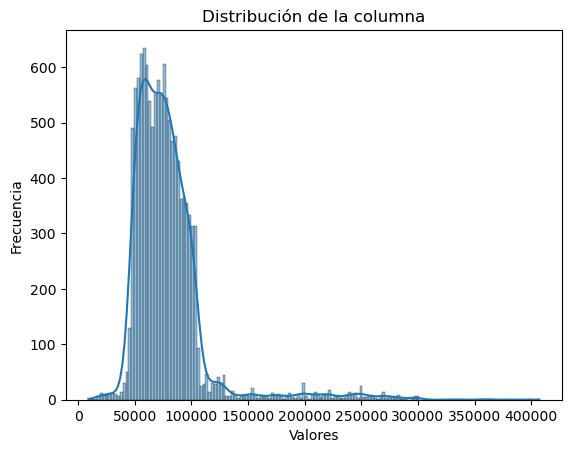

In [108]:
# GESTIÓN DE NULOS:

# Calculamos la asimetría (skewness)
asimetria = skew(df_loyalty_hist["Salary"].dropna())  # Ignora valores nulos

print(f"Asimetría de la columna: {asimetria:.2f}")

# Comprobaciones para saber si usar media o mediana.
if -0.5 <= asimetria <= 0.5:
    print("La distribución es aproximadamente simétrica. Usar la media.")
else:
    print("La distribución no es simétrica. Usar la mediana.")

# Gráfico de la distribución de la columna para una inspección visual.
sns.histplot(df_loyalty_hist["Salary"].dropna(), kde = True)
plt.title("Distribución de la columna")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.show()

In [109]:
# Al comprobar que los datos son asimétricos rellenaremos con la mediana.
mediana = df_loyalty_hist["Salary"].median()
df_loyalty_hist["Salary"].fillna(mediana, inplace=True)

In [110]:
# Comprobamos los cambios tras imputar los nulos con la mediana.
df_loyalty_hist["Salary"].isnull().sum()

0

In [116]:
# Función para cambiar datos de tipo FLOAT ➡️ INT.
# ----------------------------------------------------------------------

# Creamos la variable de las columnas a las que aplicaremos este cambio. 
float_a_int = ["Cancellation Year", "Cancellation Month"]

# ----------------------------------------------------------------------

def convertir_float_a_int(df, lista_cols):
    for columna in lista_cols:
        if columna in df.columns and pd.api.types.is_numeric_dtype(df[columna]):

            # Convertimos a int, manteniendo NaN y valores no numéricos como NaN
            df[columna] = df[columna].astype('Int64')
            print(f"Columna {columna} convertida a integer.")

convertir_float_a_int(df_loyalty_hist, float_a_int)

Columna Cancellation Year convertida a integer.
Columna Cancellation Month convertida a integer.


In [117]:
# Comprobamos los cambios tras aplicar la función de limpieza.
df_loyalty_hist[["Cancellation Year", "Cancellation Month"]].dtypes

Cancellation Year     Int64
Cancellation Month    Int64
dtype: object

In [118]:
# Realizamos una segunda comprobación.
print(f"Valores únicos en Cancellation Year corregidos: {df_loyalty_hist["Cancellation Year"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Cancellation Month corregidos: {df_loyalty_hist["Cancellation Month"].unique()}")

Valores únicos en Cancellation Year corregidos: <IntegerArray>
[<NA>, 2018, 2015, 2017, 2014, 2016, 2013]
Length: 7, dtype: Int64
--------------------------------------------------------------------------------------------
Valores únicos en Cancellation Month corregidos: <IntegerArray>
[<NA>, 1, 12, 4, 2, 7, 11, 5, 6, 10, 8, 9, 3]
Length: 13, dtype: Int64


Tomamos una decisión para cambiar el tipo de los datos de las columnas "Cancellation Year" y "Cancellation Month" de *float* a *int*, al considerarlos un error, ya que no hay razón lógica por la cual éstos deban incluir decimales. Sin embargo, al realizar este cambio, los valores faltantes que antes aparecían en blanco, aparecerán ahora con "NA" ya que "NaN" es un float y no un integer.\
Al no tener que trabajar con estas columnas, priorizamos que el tipo de valor sea int, más que la visualización en el csv de los valores nulos en blanco.

##### **<span style="color:#FFA500">Unión DataFrames</span>**

In [119]:
df_union = df_loyalty_hist.merge(df_flight_sin_duplicados, how = "inner", on = "Loyalty Number",
                      left_on = None, right_on = None)

df_union.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,<NA>,<NA>,2017,1,0,0,0,0,0.0,0.0,0.0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,<NA>,<NA>,2017,2,3,0,3,2823,282.0,0.0,0.0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,<NA>,<NA>,2017,3,0,0,0,0,0.0,0.0,0.0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,<NA>,<NA>,2017,4,0,0,0,0,0.0,0.0,0.0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,<NA>,<NA>,2018,10,6,2,8,3352,335.0,465.0,38.0


In [120]:
print(f"Filas y columnas del df_union: {df_union.shape}")

Filas y columnas del df_union: (401688, 25)


In [121]:
df_union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401688 entries, 0 to 401687
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               401688 non-null  int64  
 1   Country                      401688 non-null  object 
 2   Province                     401688 non-null  object 
 3   City                         401688 non-null  object 
 4   Postal Code                  401688 non-null  object 
 5   Gender                       401688 non-null  object 
 6   Education                    401688 non-null  object 
 7   Salary                       401688 non-null  float64
 8   Marital Status               401688 non-null  object 
 9   Loyalty Card                 401688 non-null  object 
 10  CLV                          401688 non-null  float64
 11  Enrollment Type              401688 non-null  object 
 12  Enrollment Year              401688 non-null  int64  
 13 

In [123]:
# Guardamos el csv unido con todas las columnas, incluidas ["Cancellation Year", "Cancellation Month"]. 
df_union.to_csv("info_aerolinea.csv",index=False)

In [124]:
# Creamos otro DataFrame apartando las columnas ["Cancellation Year", "Cancellation Month"] para que no trabajar con un porcentaje alto de nulos durante nuestro análisis.
df_union_sin_nulos = df_union[['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
                            'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
                            'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month', 'Year', 
                            'Month','Flights Booked', 'Flights with Companions', 'Total Flights', 
                            'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']]

In [125]:
# Guardamos el csv unido apartando las columnas ["Cancellation Year", "Cancellation Month"] para que no afecten significativamente al análisis posterior.
df_union_sin_nulos.to_csv("info_aerolinea2.csv",index=False)

In [126]:
# Chequeamos las columnas de ambos DataFrames.
df_union.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month', 'Year', 'Month',
       'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

In [127]:
# Chequeamos las columnas de ambos DataFrames.
df_union_sin_nulos.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month', 'Year',
       'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

### **Fase 2\. <span style="color:#00bf63">Visualización:</span>**

In [128]:
# Nos aseguramos de que la tipología de escritura esté en DejaVu Sans.
plt.rcParams['font.family'] = ['DejaVu Sans']

In [129]:
# Comprobamos los tipos de datos que contienen las columnas para escoger métodos de visualización adecuados.
df_union_sin_nulos.dtypes

Loyalty Number                   int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                float64
Dollar Cost Points Redeemed    float64
dtype: object

#### **1. <span>¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?</span>**

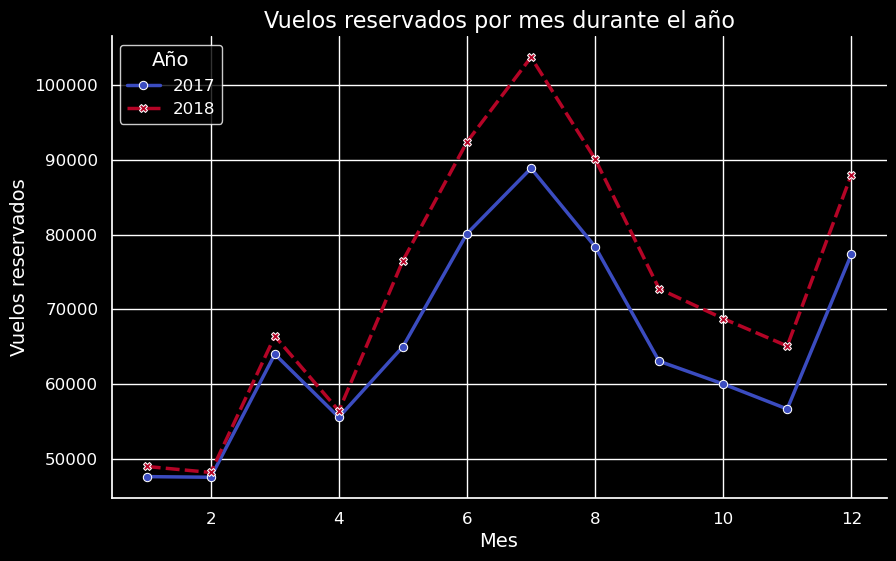

In [138]:
# Para comprobar el distribución de la cantidad de vuelos reservados por mes durante el año.
# hacemos uso de un gráfico de líneas/lineplot donde se muestre la tendencia de los vuelos reservados a lo largo del tiempo.

# Agrupamos los datos por 'Year' anyd 'Month' y calculamos la suma de 'Flights Booked'.
df_agrupado1 = df_union_sin_nulos.groupby(['Year', 'Month'])['Flights Booked'].sum().reset_index()

# Establecemos un estilo oscuro para el gráfico.
sns.set_style("darkgrid")

# Creamos la figura y los ejes con un tamaño personalizado.
fig, ax = plt.subplots(figsize=(10, 6))

# Personalizamos el fondo de la figura y los ejes.
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Creamos el gráfico de líneas con una paleta de colores personalizada y marcadores.
sns.lineplot(
    data=df_agrupado1,
    x='Month',
    y='Flights Booked',
    hue='Year',
    palette='coolwarm',  
    style='Year',  # Estilo de línea para cada año
    markers=True,  # Agregamos marcadores a las líneas
    linewidth=2.5,  
    ax=ax
)

# Personalizamos las etiquetas de los ejes.
ax.set_xlabel('Mes', fontsize=14, color='white')
ax.set_ylabel('Vuelos reservados', fontsize=14, color='white')
ax.set_title('Vuelos reservados por mes durante el año', fontsize=16, color='white')

# Personalizamos la leyenda para una mejor lectura del gráfico.
legend = ax.legend(title='Año', fontsize=12, title_fontsize=14, loc='upper left', frameon=True, facecolor='black', edgecolor='white')
plt.setp(legend.get_texts(), color='white')
plt.setp(legend.get_title(), color='white')

# Eliminamos las líneas superior y derecha del gráfico.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Personalizamos los ticks de los ejes.
ax.tick_params(axis='both', colors='white', labelsize=12)

# Mostramos el gráfico
plt.show()

##### **<span style="color:#00bf63">Interpretación:</span>**

En esta gráfica, observamos que durante las épocas de vacaciones de Semana Santa, verano y navidades hay mayor cantidad de vuelos reservados debido al gran movimiento migratorio en estos períodos del año. Debido a una mayor duración del período vacacional de verano, la demanda se mantiene durante más tiempo, con un repunte en el séptimo mes de julio.

Inferimos entonces que la distribución de la reserva de vuelos a nivel anual sigue un claro patrón, con una mayor demanda durante los meses de verano y una menor demanda durante los meses de invierno (enero, febrero y marzo). Los motivos de tal descenso podrían haber sido causados tanto por la demanda turística, como por factores climáticos, así como el calendario laboral y de festivos nacional como en la cultura de occidente.

Si bien es cierto que esta tendencia estacional se mantiene más o menos estable, hay una clara diferencia entre 2017 y 2018. Esto podría deberse a la celebración de un campeonato mundial de fútbol, las olimpiadas, ofertas en los vuelos, o un mejor posicionamiento de la empresa frente a sus competidores, ganando popularidad entre los clientes, entre otros motivos.

#### **2. <span>¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?</span>**

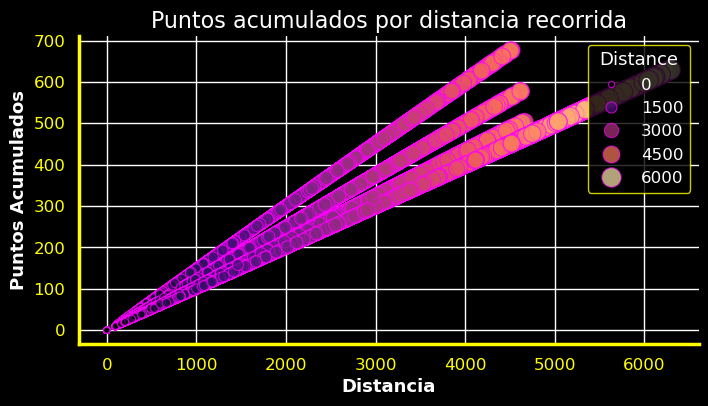

In [137]:
# Establecemos el estilo general de la gráfica.
sns.set_theme(style="darkgrid")

# Creamos la figura y los ejes con un tamaño más grande.
fig, ax = plt.subplots(figsize=(8, 4))
fig.patch.set_facecolor('black')  # Cambia el fondo de toda la figura a negro.

# Creamos el scatterplot con una paleta de colores cálida para destacar los puntos.
scatter = sns.scatterplot(
    x="Distance",
    y="Points Accumulated",
    size="Distance",                    # Tamaño del punto basado en la distancia.
    sizes=(20, 200),                    # Tamaño de los puntos más amplio.
    hue="Distance",                     # Color del punto basado en la distancia.
    palette="magma",                    # Usar la paleta 'magma' para el color.
    alpha=0.7,                          # Convierte los puntos semitransparentes.
    edgecolor="fuchsia",                # Cambia el color del borde de los puntos a amarillo
    linewidth=0.8,                      # Espesor del borde de los puntos.
    data=df_union_sin_nulos,
    ax=ax,                              # Especifíca el eje.
)

# Ajustamos las etiquetas de los ejes con tamaño 13, negrita y color negro.
ax.set_xlabel('Distancia', fontsize=13, color='white', weight='bold')
ax.set_ylabel('Puntos Acumulados', fontsize=13, color='white', weight='bold')
ax.set_title('Puntos acumulados por distancia recorrida', fontsize=16, color='white')


# Cambiamos el fondo de los ejes para hacerlo negro.
ax.set_facecolor('black')  # Fondo del área de la gráfica a negro
ax.spines['top'].set_visible(False)     # Oculta línea superior.
ax.spines['right'].set_visible(False)   # Oculta línea derecha.
ax.spines['left'].set_linewidth(2.5)    # Hace la línea del eje Y más gruesa.
ax.spines['bottom'].set_linewidth(2.5)  # Hace la línea del eje X más gruesa.
ax.spines['left'].set_color('yellow')   # Cambia el color de la línea del eje Y a amarillo.
ax.spines['bottom'].set_color('yellow') # Cambia el color de la línea del eje X a amarillo.


# Cambiamos el color de los números de los ejes a amarillo.
ax.tick_params(axis='x', colors='yellow', labelsize=12)
ax.tick_params(axis='y', colors='yellow', labelsize=12) 


# Personalizamos la leyenda.
legend = ax.legend(title='Distance', fontsize=12, title_fontsize='13', loc='upper right', frameon=True, facecolor='black', edgecolor='yellow')
plt.setp(legend.get_texts(), color='white')
plt.setp(legend.get_title(), color='white')


# Ponemos título a la gráfica.
#plt.title('Distancia recorrida puntos acumulados', fontsize=14, color='white', pad=35)


# Mostramos la gráfica con fondo negro.
plt.show()

##### **<span style="color:#00bf63">Interpretación:</span>**

La gráfica muestra que mayor distancia recorrida, más puntos acumulará el cliente, leyéndose como una correlacion fuerte, positiva y ascendente entre ambas variables.\
Es decir, a medida que aumenta la distancia recorrida por el cliente en vuelos aéreos, también aumentará la cantidad de puntos acumulados.

Esto sugiere que la compañía aérea recompensa al cliente los kilometros recorridos usando su aerolínea. Al ser una correlación fuerte y positiva, podemos inferir que esta estrategia de marketing de incentivar al cliente con puntos es efectiva en atracción y retención del consumidor.

Además, visualmente, no se muestran valores atípicos, y la distribución de puntos es lineal y bastante uniforme.

#### **3. <span>¿Cuál es la distribución de los clientes por provincia o estado?</span>**

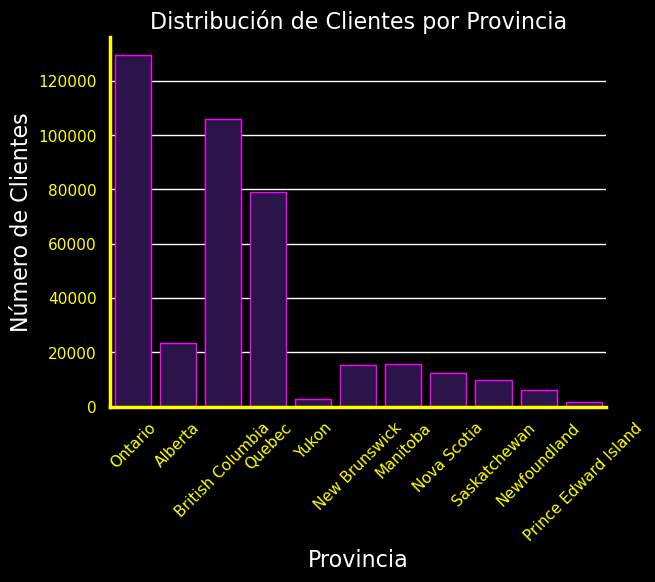

In [166]:
# Usamos la paleta de colores inferno.
sns.set_palette("inferno")


# Creamos la figura y el eje, y establecemos el color de fondo a negro.
fig, ax = plt.subplots()
fig.patch.set_facecolor('black')  # Cambia el color de fondo de la figura a negro.
ax.set_facecolor('black')         # Cambia el color de fondo del área de la gráfica a negro.


# Creamos el countplot.
sns.countplot(x = 'Province', data = df_union_sin_nulos, edgecolor='fuchsia', ax=ax)
plt.xticks(rotation = 45)  # Rota las etiquetas del eje x si son muy largas.


# Ajustamos el color de las etiquetas y personalizamos el tamaño de las fuentes.
ax.set_xlabel('Provincia', fontsize=16, color='white')  # Cambia el color y tamaño de la etiqueta del eje X a blanco.
ax.set_ylabel('Número de Clientes', fontsize=16, color='white')  # Cambia el color y tamaño de la etiqueta del eje Y a blanco.
ax.set_title('Distribución de Clientes por Provincia', fontsize=16, color='white')

# Personalizamos los ejes.
ax.spines['top'].set_visible(False)     # Oculta línea superior.
ax.spines['right'].set_visible(False)   # Oculta línea derecha.
ax.spines['left'].set_linewidth(2.5)    # Hace la línea del eje Y más gruesa.
ax.spines['bottom'].set_linewidth(2.5)  # Hace la línea del eje X más gruesa.
ax.spines['left'].set_color('yellow')   # Cambia el color de la línea del eje Y.
ax.spines['bottom'].set_color('yellow') # Cambia el color de la línea del eje X.


# Cambiamos el color de los números y nombres de los ejes a amarillo.
ax.tick_params(axis='x', colors='yellow')
ax.tick_params(axis='y', colors='yellow')


# Mostramos el gráfico.
plt.show()

##### **<span style="color:#00bf63">Interpretación:</span>**
En esta gráfica, observamos el número de clientes (eje Y) que hay por cada provincia canadiense donde a mayor altura de la barra, mayor cantidad de clientes residirán ahí.\
Identificamos que la mayor concentración de clientes de esta aerolínea se encuentra en las provincias de Ontario, British Columbia y Quebec, superando significativamente al resto.
Esto podría deberse a que gran parte de la densidad poblacional de Canadá esté ubicada en estas provincias.

En contraste, Prince Edward Island, Yukon y Newfoundland son las provincias con la menor cantidad de clientes, indicando una menor presencia de mercado de la compañía en esta región.\
Esto podría deberse a su situación geográfica (provincias orientales y del norte), que a su vez podría tener una correlación directa con el tiempo atmosférico y la posibilidad de vuelo. Ya que éstas son zonas que sufren condiciones meteorológicas extremas que dificultarían y en algunos casos, imposibilitarían el vuelo (tormentas de invierno, pistas de aterrizaje heladas, etc.).

#### **4. <span>¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?</span>**

In [161]:
df_salary_education = df_union_sin_nulos.groupby("Education")["Salary"].mean().round(2).reset_index()
df_salary_education

,Education,Salary
0,Bachelor,72577.25
1,College,73455.00
2,Doctor,178608.90
3,High School or Below,61199.16
4,Master,103757.85


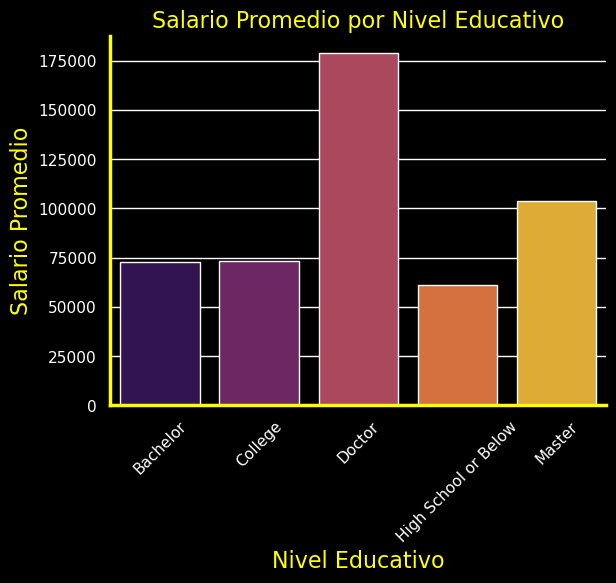

In [175]:
# Creamos la figura y el eje, y establecemos el color de fondo a negro.
fig, ax = plt.subplots()
fig.patch.set_facecolor('black')  # Cambia el color de fondo de la figura a negro.
ax.set_facecolor('black')         # Cambia el color de fondo del área de la gráfica a negro.


sns.barplot(x = "Education", 
            y = "Salary", 
            data = df_salary_education,
            palette = "inferno")


# Ajustamos el color de las etiquetas y personalizamos el tamaño de las fuentes.
ax.set_xlabel('Nivel Educativo', fontsize=16, color='yellow')  # Cambia el color y tamaño de la etiqueta del eje X a blanco.
ax.set_ylabel('Salario Promedio', fontsize=16, color='yellow')  # Cambia el color y tamaño de la etiqueta del eje Y a blanco.
ax.set_title('Salario Promedio por Nivel Educativo', fontsize=16, color='yellow')
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para mejor legibilidad.

# Personalizamos los ejes.
ax.spines['top'].set_visible(False)     # Oculta línea superior.
ax.spines['right'].set_visible(False)   # Oculta línea derecha.
ax.spines['left'].set_linewidth(2.5)    # Hace la línea del eje Y más gruesa.
ax.spines['bottom'].set_linewidth(2.5)  # Hace la línea del eje X más gruesa.
ax.spines['left'].set_color('yellow')   # Cambia el color de la línea del eje Y.
ax.spines['bottom'].set_color('yellow') # Cambia el color de la línea del eje X.

# Cambiamos el color de los números y nombres de los ejes a amarillo.
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Mostramos el gráfico.
plt.show()

##### **<span style="color:#00bf63">Interpretación:</span>**

Según los resultamos mostrados en la gráfica podríamos concluir que hay una gran correlación positiva entre ambas variables, ya que a mayor nivel ducativo mejor salario recibe el cliente.
 
Es decir, el nivel educativo tiene un impacto significativo en el salario promedio recibido. Aquellos clientes que hayan cursado un doctorado tienen el mayor salario promedio, mientras que los clientes con el menor salario promedio son aquellos que dejaron el sistema educativo al graduarse del instituto (E.S.O.) o incluso antes.

Esto sugiere que la educación de postgrado puede abrir puertas a mejores oportunidades laborales y de remuneración.

Por otra parte, aquellos clientes graduados de la universidad (Bachelor) o de bachiller (College) tienen salarios promedios muy similares, indicando que los tipos de roles a los que aspiran, y sus respectivos salarios, también lo sean.

En conclusión, la gráfica pone de manifiesto la importancia de la educación superior para acceder a mejores puestos de trabajo y mayores ingresos, 
y subraya la existencia de una brecha salarial considerable entre los doctores y el resto de los niveles educativos, sugiriendo que estas profesiones están mejor remuneradas.

#### **5. <span>¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?</span>**

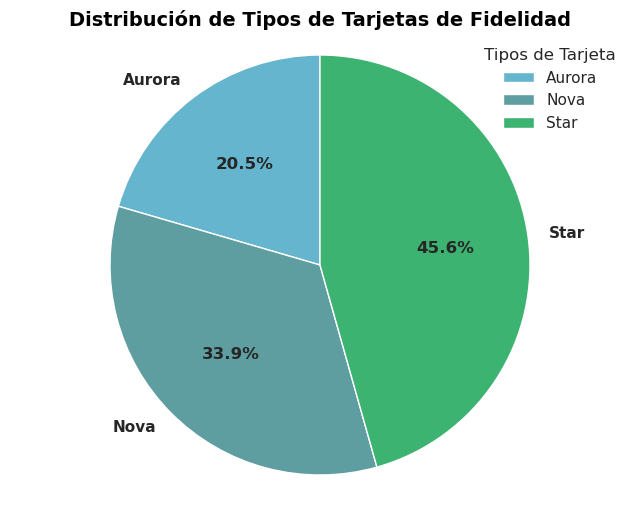

In [146]:
# Agrupamos los datos por tipo de tarjeta y contamos las ocurrencias.
df_agrupado2 = df_union_sin_nulos.groupby('Loyalty Card').size()


# Generamos una lista de colores.
colores = ["c", "cadetblue", "mediumseagreen", "seagreen", "teal", "turquoise", "lightseagreen"]


# Creamos el gráfico.
plt.figure(figsize=(8, 6))
plt.pie(df_agrupado2, labels=df_agrupado2.index, autopct='%1.1f%%', colors=colores, startangle=90, textprops={'fontweight': 'bold'})


# Agregamos una leyenda.
plt.legend(title="Tipos de Tarjeta", loc='upper right', frameon=False)


# Ajustamos el aspecto del gráfico.
plt.axis('equal')  # Asegura que el gráfico sea un círculo perfecto.
plt.title('Distribución de Tipos de Tarjetas de Fidelidad', fontsize=14, color='black', weight='bold')


# Mostramos el gráfico.
plt.show()

##### **<span style="color:#00bf63">Interpretación:</span>**
La distribución de los datos indica una clara preferencia a la tarjeta llamada *Star*, considerada la más popular entre los clientes ya que representa el 45.4% del total. Esta popularidad podría deberse a que ofrece mayores beneficios.\
La tarjeta *Nova*  es escogida por los clientes un 33.9%, indicando una diferencia del 11.5% en comparación con *Star*.\
La tarjeta *Aurora* es, por lo tanto, la menos popular de las tres opciones, representando el 20.7% del total, quizás porque las características de esta tarjeta no sean tan atractivas como las de las otras dos o porque su campaña de promoción no ha tenido tanto impacto.


#### **6. <span>¿Cómo se distribuyen los clientes según su estado civil y género?</span>**

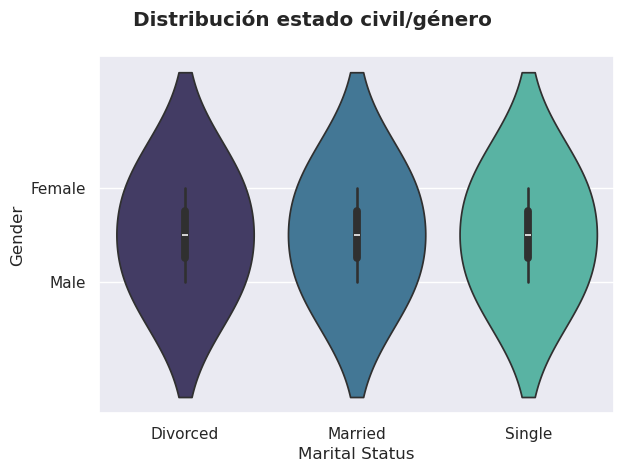

In [159]:
# Agrupamos los datos por EstadoCivil y contamos las ocurrencias de cada género.
df_agrupado3 = df_union_sin_nulos.groupby(['Marital Status', 'Gender']).size().unstack()


# Creamos el gráfico.
sns.violinplot(x = 'Marital Status', 
               y = 'Gender', 
               data = df_agrupado3.stack().reset_index(),
               palette = "mako")


# Añadimos título al gráfico.
plt.suptitle("Distribución estado civil/género", weight='bold')

# Ajustamos los elementos del gráfico.
plt.tight_layout()

# Mostramos el gráfico.
plt.show()

##### **<span style="color:#00bf63">Interpretación:</span>**

### **Fase 3\. <span style="color:#00bf63">Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo:</span>**

#### **1. <span>Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.</span>**

In [ ]:
df_preparacion_datos = df_union_sin_nulos["Flights Booked", "Education"]


#### **2. <span>Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estándar, los percentiles…)</span>**

In [ ]:
est_desc_education = df_union_sin_nulos.groupby("Education").agg(["mean", "median", "std", "var", "min", "max"])
est_desc_education

##### **<span style="color:#00bf63">Conclusiones:</span>**


#### **3. <span>Prueba Estadística: Realiza una prueba A/B Testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.</span>**